In [64]:
from torchvision import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import torch.utils.data as DATA
import numpy as np

In [65]:
set_x = torch.tensor([[1.], [2.05], [3.]], requires_grad=False)
set_y= torch.tensor([[2.], [4.], [6.]], requires_grad=False)

In [66]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
    def __repr__(self):
        repr = ""
        for name, param in self.named_parameters():
            if param.requires_grad:
                repr += f'{name} {param.data}\n'
        return repr

In [67]:
get_model = LinearRegressionModel()
criter = torch.nn.MSELoss()
opt= torch.optim.Adam(get_model.parameters(), lr=0.1)

In [68]:
get_model

linear.weight tensor([[-0.1150]])
linear.bias tensor([-0.1580])

In [69]:
predict_y = get_model(set_x)
loss = criter(predict_y, set_y)
loss.item()

22.25414276123047

In [70]:
loss_array = []
loss_last = -1000
for i in range(0,400):
    predict_y = get_model(set_x)
    loss = criter(predict_y, set_y)
    loss_array.append(loss)
    opt.zero_grad()
    loss.backward()
    opt.step()
    if abs(loss.item() - loss_last) < 1e-7: break
    loss_last = loss.item()


In [71]:
get_model

linear.weight tensor([[1.9967]])
linear.bias tensor([-0.0264])

In [72]:
predict_y = get_model(set_x)
loss = criter(predict_y, set_y)
loss.item()

0.002222164301201701

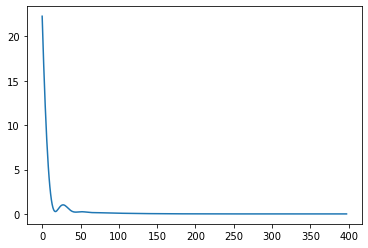

In [73]:
plt_x = range(len(loss_array))
plt_y = [loss.item() for loss in loss_array]
plt.plot(plt_x, plt_y)